## Chapter 08. 쇼핑몰 매출 예측 (Time Series)

### 01. 분석의 목적
- Time Series: 시계열 분석
- 시간 관련 데이터를 다양하게 조작하기
- fbprophet 모듈을 통한 시계열 예측
- AutoRegressive 알고리즘을 통한 예측

### 02. 날짜 데이터 처리 변환하기

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta

In [2]:
today = datetime.now()

today

datetime.datetime(2022, 3, 4, 17, 8, 55, 720244)

In [3]:
today.year

2022

In [4]:
today.microsecond

720244

In [5]:
today + timedelta(days=10)

datetime.datetime(2022, 3, 14, 17, 8, 55, 720244)

In [6]:
today + timedelta(weeks=3)

datetime.datetime(2022, 3, 25, 17, 8, 55, 720244)

In [7]:
data = pd.DataFrame({'date': ['11/1/2020', '11/2/2020', '11/3/2020'], 'value': [10, 20, 30]})

data

,date,value
0,11/1/2020,10
1,11/2/2020,20
2,11/3/2020,30


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   value   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


- 날짜를 넣으려는 date 열의 type이 object로 들어가있는 걸 확인할 수 있음

In [9]:
data['date'] = pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [10]:
data['date'].loc[0].year

2020

In [11]:
data = pd.DataFrame({'date': ['11-1-2020 1:11:11', '11-2-2020 2:11:11', '11-3-2020 3:11:11'], 'value': [10, 20, 30]})

data

,date,value
0,11-1-2020 1:11:11,10
1,11-2-2020 2:11:11,20
2,11-3-2020 3:11:11,30


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   value   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [13]:
data['date'] = pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [14]:
data['date'].loc[0].minute

11

In [15]:
data = pd.DataFrame({'date': ['10-11-10', '10-11-11', '10-11-12'], 'value': [10, 20, 30]})

data

,date,value
0,10-11-10,10
1,10-11-11,20
2,10-11-12,30


In [16]:
pd.to_datetime(data['date'])

0   2010-10-11
1   2011-10-11
2   2012-10-11
Name: date, dtype: datetime64[ns]

- '년-월-일'의 형식으로 입력하고 싶었으나, '월-일-년'으로 들어간 걸 볼 수 있음
- format 참고: docs.python.org/3.8/library/time.html

In [17]:
pd.to_datetime(data['date'], format='%y-%m-%d')

0   2010-11-10
1   2010-11-11
2   2010-11-12
Name: date, dtype: datetime64[ns]

In [18]:
data = pd.read_excel('./data/Superstore.xls')

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
data = data[['Order Date', 'Ship Date', 'Sales', 'Profit']]

data.head()

,Order Date,Ship Date,Sales,Profit
0,2016-11-08,2016-11-11,261.9600,41.9136
1,2016-11-08,2016-11-11,731.9400,219.5820
2,2016-06-12,2016-06-16,14.6200,6.8714
3,2015-10-11,2015-10-18,957.5775,-383.0310
4,2015-10-11,2015-10-18,22.3680,2.5164


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Ship Date   9994 non-null   datetime64[ns]
 2   Sales       9994 non-null   float64       
 3   Profit      9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 312.4 KB


In [21]:
data['gap'] = data['Ship Date'] - data['Order Date']

data.head()

,Order Date,Ship Date,Sales,Profit,gap
0,2016-11-08,2016-11-11,261.9600,41.9136,3 days
1,2016-11-08,2016-11-11,731.9400,219.5820,3 days
2,2016-06-12,2016-06-16,14.6200,6.8714,4 days
3,2015-10-11,2015-10-18,957.5775,-383.0310,7 days
4,2015-10-11,2015-10-18,22.3680,2.5164,7 days


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = data[['Profit', 'gap']]
y = data['Sales']

model.fit(X, y)

/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/sysanal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_

TypeError: float() argument must be a string or a number, not 'Timedelta'

- Timedelta 타입으로 모델을 학습시키려 하면 위와 같이 에러가 발생

In [23]:
X['gap'].loc[0].days

3

In [24]:
X['gap'] = X['gap'].apply(lambda x: x.days)

/Users/sysanal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
X.head()

,Profit,gap
0,41.9136,3
1,219.5820,3
2,6.8714,4
3,-383.0310,7
4,2.5164,7


In [26]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
model.predict(X)

array([248.5051552 , 474.93985046, 202.01637137, ..., 216.14692021,
       208.40675263, 284.40140338])

- 날짜를 Unix Timestamp 형식으로 바꿔 사용할 수도 있음
- Unix Timestamp는 01/01/1970을 기준으로 초단위로 쌓여 나가는 숫자

In [28]:
data = pd.read_excel('./data/Superstore.xls')

data = data[['Order Date', 'Ship Date', 'Sales', 'Profit']]

data.head()

,Order Date,Ship Date,Sales,Profit
0,2016-11-08,2016-11-11,261.9600,41.9136
1,2016-11-08,2016-11-11,731.9400,219.5820
2,2016-06-12,2016-06-16,14.6200,6.8714
3,2015-10-11,2015-10-18,957.5775,-383.0310
4,2015-10-11,2015-10-18,22.3680,2.5164


In [29]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.to_numeric(data['Order Date']) / 10**9

0      1478563200
1      1478563200
2      1465689600
3      1444521600
4      1444521600
          ...    
9989   1390262400
9990   1488067200
9991   1488067200
9992   1488067200
9993   1493856000
Name: Order Date, Length: 9994, dtype: float64

In [30]:
data['Order Date'] = pd.to_numeric(data['Order Date']) / 10**9
data['Ship Date'] = pd.to_numeric(data['Ship Date']) / 10**9

data.head(10)

,Order Date,Ship Date,Sales,Profit
0,1478563200,1478822400,262,42
1,1478563200,1478822400,732,220
2,1465689600,1466035200,15,7
3,1444521600,1445126400,958,-383
4,1444521600,1445126400,22,3
5,1402272000,1402704000,49,14
6,1402272000,1402704000,7,2
7,1402272000,1402704000,907,91
8,1402272000,1402704000,19,6
9,1402272000,1402704000,115,34


In [31]:
data['gap'] = data['Ship Date'] - data['Order Date']

data.head(10)

,Order Date,Ship Date,Sales,Profit,gap
0,1478563200,1478822400,262,42,259200
1,1478563200,1478822400,732,220,259200
2,1465689600,1466035200,15,7,345600
3,1444521600,1445126400,958,-383,604800
4,1444521600,1445126400,22,3,604800
5,1402272000,1402704000,49,14,432000
6,1402272000,1402704000,7,2,432000
7,1402272000,1402704000,907,91,432000
8,1402272000,1402704000,19,6,432000
9,1402272000,1402704000,115,34,432000


In [32]:
X = data[['Profit', 'gap']]
y = data['Sales']

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 03. fbprophet 모듈 설치
- pip install pystan plotly
- conda install -c conda-forge conda
- conda insatll -c conda-forge fbprophet

### 04. 데이터 및 모듈 로딩 & 데이터 특성 확인하기

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_excel('./data/Superstore.xls', index_col=0)

data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262,2,0,42
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732,3,0,220
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15,2,0,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958,5,0,-383
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,2,0,3


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [36]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994
mean,55190,230,4,0,29
std,32064,623,2,0,234
min,1040,0,1,0,-6600
25%,23223,17,2,0,2
50%,56430,54,3,0,9
75%,90008,210,5,0,29
max,99301,22638,14,1,8400


### 05. 데이터만 필터링 및 월단위 데이터로 변환

In [37]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [38]:
data['Category'] == 'Furniture'

Row ID
1        True
2        True
3       False
4        True
5       False
        ...  
9990     True
9991     True
9992    False
9993    False
9994    False
Name: Category, Length: 9994, dtype: bool

In [39]:
furniture_data = data[data['Category'] == 'Furniture']

furniture_data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262,2,0,42
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732,3,0,220
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958,5,0,-383
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,49,7,0,14
11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706,9,0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383,4,0,-68
9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13,1,0,6
9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,86,1,0,22


In [40]:
furniture_data = furniture_data[['Order Date', 'Sales']]

furniture_data.sort_values('Order Date')

,Order Date,Sales
Row ID,,
7475,2014-01-06,2574
7661,2014-01-07,77
867,2014-01-10,52
717,2014-01-11,10
2979,2014-01-13,546
...,...,...
7637,2017-12-29,259
7633,2017-12-29,1208
5132,2017-12-29,101


In [41]:
furniture_data = furniture_data.groupby('Order Date').sum()

furniture_data

,Sales
Order Date,
2014-01-06,2574
2014-01-07,77
2014-01-10,52
2014-01-11,10
2014-01-13,880
...,...
2017-12-24,1393
2017-12-25,832
2017-12-28,551


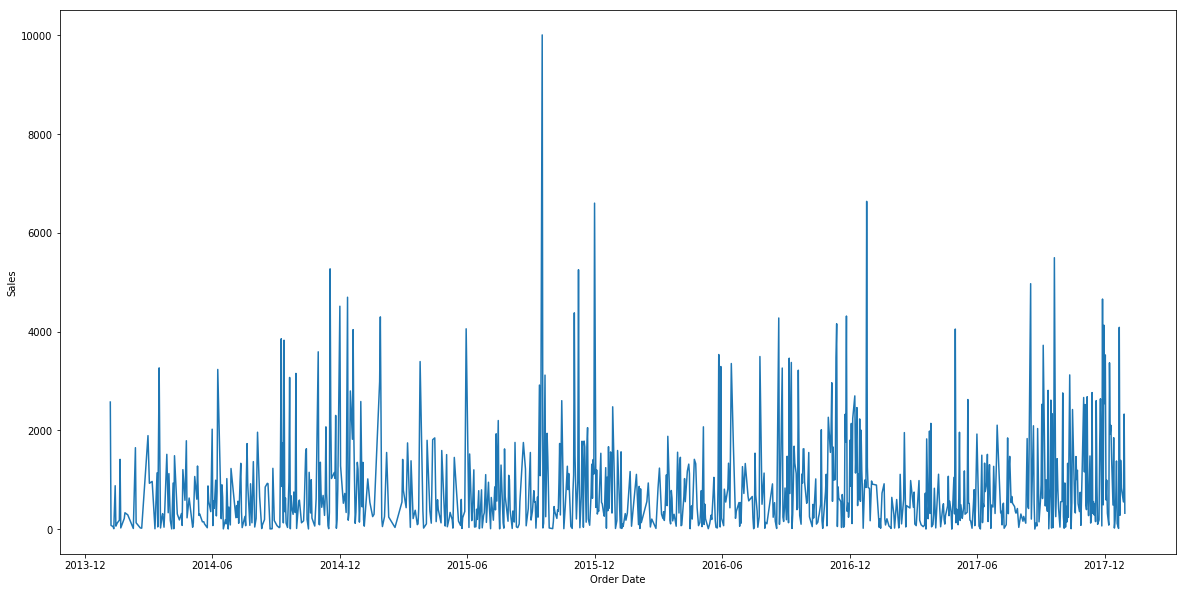

In [42]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=furniture_data.index, y=furniture_data['Sales'])

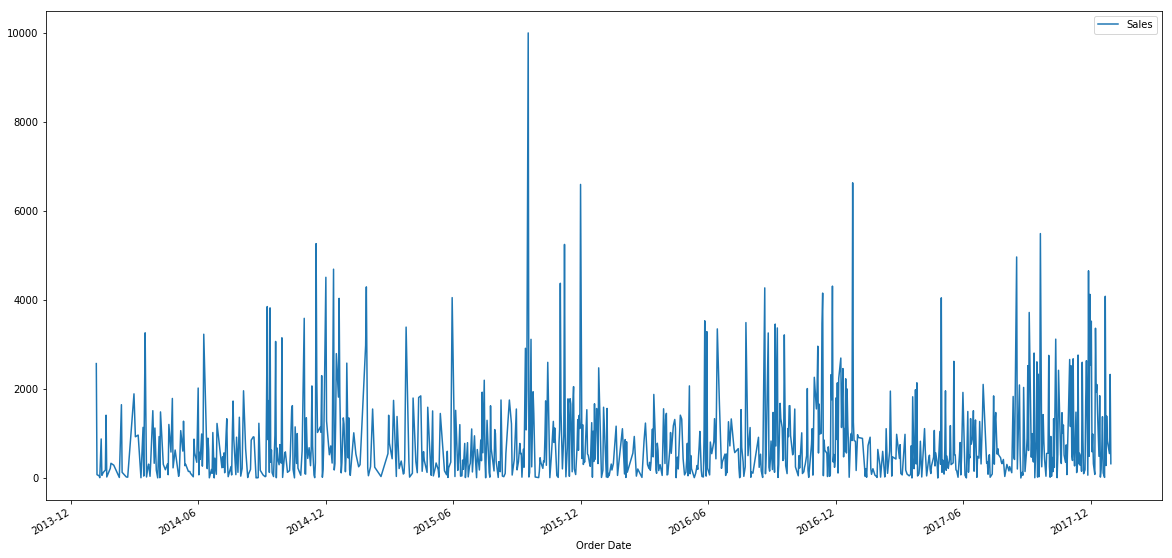

In [43]:
furniture_data.plot(figsize=(20, 10))

- resample()을 사용해 주, 월, 분기 등으로 묶을 수 있음

In [44]:
furniture_data = furniture_data.resample('MS').mean()

furniture_data

,Sales
Order Date,
2014-01-01,480
2014-02-01,368
2014-03-01,857
2014-04-01,567
2014-05-01,432
2014-06-01,695
2014-07-01,601
2014-08-01,458
2014-09-01,992


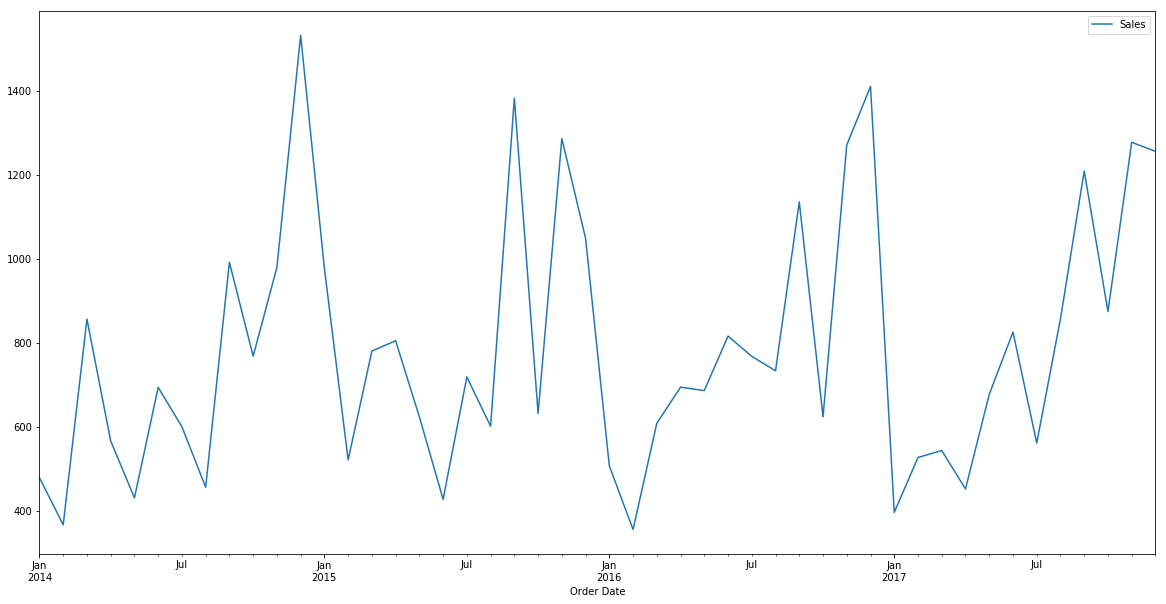

In [45]:
furniture_data.plot(figsize=(20, 10))

### 06. Prophet 알고리즘으로 시계열 데이터 예측
- fbprophet은 Facebook에서 만든 알고리즘
- 기존의 Time Series 방법에 비해 코딩이 쉬운 편이며, 쉬운 방법에 비해 예측력이 좋은 편
- Prophet은 특정한 타입의 데이터를 원하는데, ds(날짜)와 y(예측) 2개의 열로 구성되어야 함

In [46]:
from fbprophet import Prophet

df = furniture_data.reset_index()
df.columns = ['ds', 'y']

df.head(10)

,ds,y
0,2014-01-01,480
1,2014-02-01,368
2,2014-03-01,857
3,2014-04-01,567
4,2014-05-01,432
5,2014-06-01,695
6,2014-07-01,601
7,2014-08-01,458
8,2014-09-01,992
9,2014-10-01,769


In [47]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sysanal/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [48]:
future = model.make_future_dataframe(periods=12, freq='MS')

future.head(10)

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
5,2014-06-01
6,2014-07-01
7,2014-08-01
8,2014-09-01
9,2014-10-01


In [49]:
pred = model.predict(future)

pred = pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] # yhat: 예측값, lower & upper: 오차범위

pred

/Users/sysanal/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/sysanal/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,535,367,691
1,2014-02-01,451,298,606
2,2014-03-01,706,553,865
3,2014-04-01,630,484,788
4,2014-05-01,571,418,716
5,2014-06-01,619,470,775
6,2014-07-01,653,506,816
7,2014-08-01,619,471,771
8,2014-09-01,1199,1044,1353
9,2014-10-01,710,558,863


/Users/sysanal/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sysanal/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


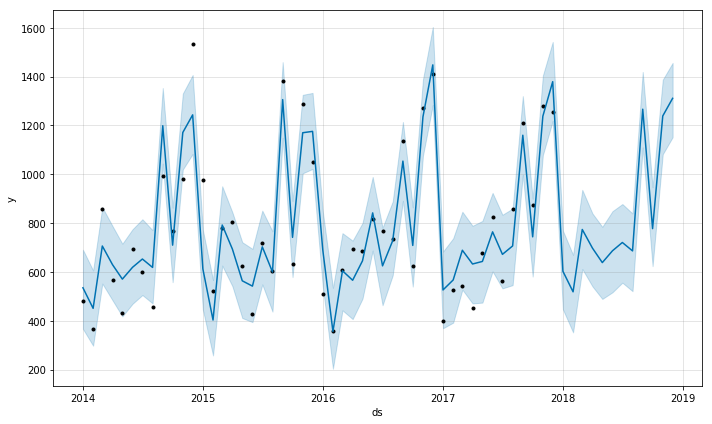

In [50]:
model.plot(pred)
plt.show()

In [51]:
new_df = furniture_data[:'2016']
new_df = new_df.reset_index()
new_df.columns = ['ds', 'y']

model = Prophet()
model.fit(new_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sysanal/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [52]:
future = model.make_future_dataframe(periods=12, freq='MS')

pred = model.predict(future)

/Users/sysanal/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/sysanal/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [53]:
pred = pred[['ds', 'yhat']]

pred

,ds,yhat
0,2014-01-01,634
1,2014-02-01,412
2,2014-03-01,732
3,2014-04-01,659
4,2014-05-01,532
5,2014-06-01,568
6,2014-07-01,647
7,2014-08-01,538
8,2014-09-01,1150
9,2014-10-01,641


In [54]:
pred.set_index('ds', inplace=True)
pred = pred['2017':]

pred

,yhat
ds,
2017-01-01,805
2017-02-01,601
2017-03-01,783
2017-04-01,755
2017-05-01,685
2017-06-01,806
2017-07-01,792
2017-08-01,714
2017-09-01,1209


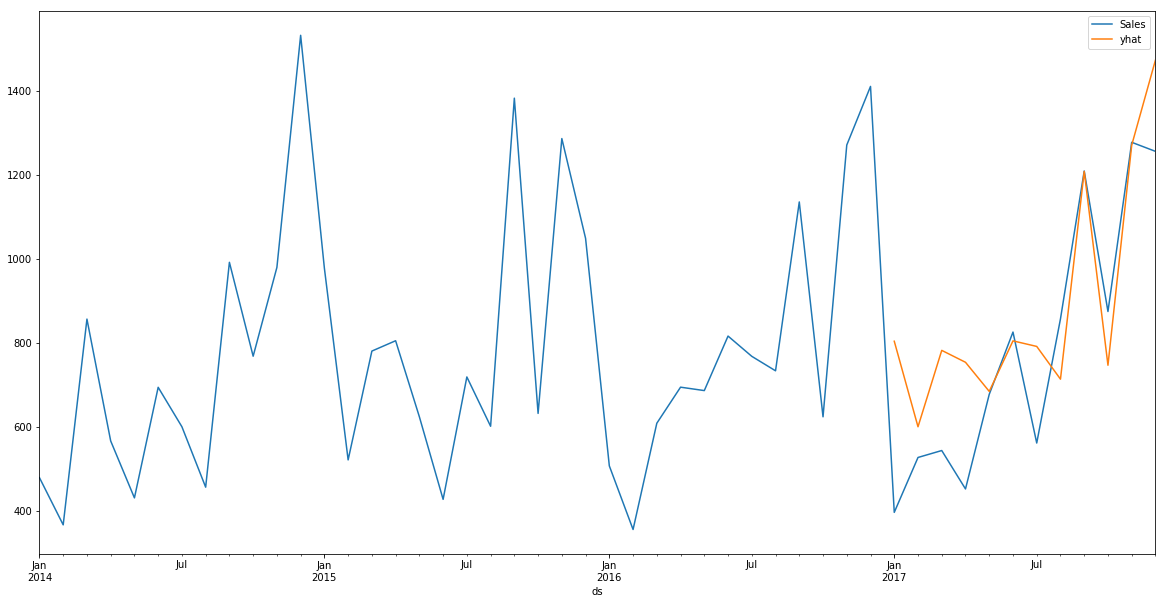

In [55]:
ax = furniture_data.plot()
pred.plot(ax=ax, figsize=(20, 10))

/Users/sysanal/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/sysanal/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/sysanal/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sysanal/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be remove

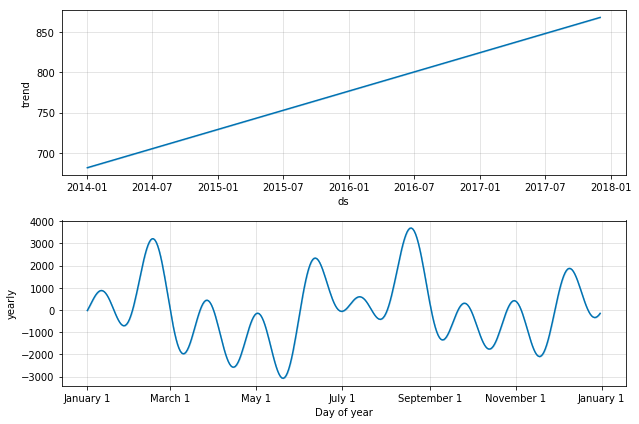

In [56]:
pred = model.predict(future)

model.plot_components(pred)

plt.show()

### 07. AR 알고리즘으로 시계열 데이터 예측
- Auto Regressive 모델은 Time Series 기법 중에서도 가장 기본에 속함
- 코딩 자체도 쉽고 알고리즘의 원리 이해도 쉬우나, 성능이 조금 떨어져 단순한 예측 가능

In [57]:
data = pd.read_excel('./data/Superstore.xls', index_col=0)
data = data[data['Category']=='Furniture']
data = data[['Order Date', 'Sales']]
data = data.groupby('Order Date').sum()
data = data.resample('MS').mean()

data

,Sales
Order Date,
2014-01-01,480
2014-02-01,368
2014-03-01,857
2014-04-01,567
2014-05-01,432
2014-06-01,695
2014-07-01,601
2014-08-01,458
2014-09-01,992


In [58]:
new_df = data[:'2016']

new_df

,Sales
Order Date,
2014-01-01,480
2014-02-01,368
2014-03-01,857
2014-04-01,567
2014-05-01,432
2014-06-01,695
2014-07-01,601
2014-08-01,458
2014-09-01,992


In [ ]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(new_df, lags=12)
modef_fit = model.fit()
pred = model.fit(start=len(new_df), end=len(new_df)+1)

In [ ]:
ax = data.plot()
pred.plot(ax=ax, figsize=(20, 10))

### 08. Time Series의 원리
- Time Series 구성 요소
    - Trend: 전반적인 추세 (상향? 하향?)
    - Seasonality: 계절성 (특정 시점 패턴)
    - Cyclic: 일정한 패턴 (계절성보다 시점에 자유로움)
    - Irregularity: 잔차 (오류, 위 3가지로 설명되지 않는 나머지)
    - 잔차가 높으면 분석하기 어려움
- Prophet을 위한 조건
    - 1년 이상의 데이터 (최소 1달)
    - Seasonality가 강할수록 좋음
    - Event/Holiday 지정 가능
    - Historical Trend Change 명확해야 좋음